In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt


from src.models import SIRM, SIRT, SIRV, SIRM_isolated, SIRV_isolated, SIRT_isolated
from src.utils.batch_sweep import sweep_one_parameter, sweep_two_parameters
from src.utils.visualization.heatmaps import plot_compartment_heatmap2
from src.utils.visualization.core import create_standalone_colorbar, Lx, Ly, discretize_cmaps

# Import the matrix creation function
from src.utils.Contact_Matrix import create_contact_matrix

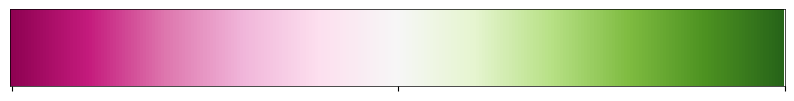

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Your custom colorscheme
colors = ['#8e0152', '#c51b7d', '#de77ae', '#f1b6da', '#fde0ef', 
          '#f7f7f7', '#e6f5d0', '#b8e186', '#7fbc41', '#4d9221', '#276419']

# Create a custom colormap using your colors
cmap_name = 'custom_diverging'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 1))

# Create data for the colorbar
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Display the colorbar
ax.imshow(gradient, aspect='auto', cmap=custom_cmap)

# Remove ticks from the plot
ax.set_yticks([])
ax.set_xticks(np.linspace(0, 256, 3))
ax.set_xticklabels([])


# Optional: Add a border to the colorbar
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(0.5)



fig.savefig('figures/Fig_0/custom_colorbar.pdf', dpi=300, bbox_inches='tight')

# Plot 3 beta distributions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import beta
from matplotlib.collections import LineCollection

In [4]:
def plot_beta_with_gradient(alpha, beta_param, Nbins=100):
    fig, ax = plt.subplots(figsize=(Lx/2*5, Ly/3*5))
    
    x = np.linspace(1/Nbins/2, 1-1/Nbins/2, Nbins)
    y = beta.pdf(x, alpha, beta_param)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    lc = LineCollection(segments, cmap=custom_cmap, norm=plt.Normalize(0, 1))
    lc.set_array(x[:-1])
    lc.set_linewidth(20)
    
    line = ax.add_collection(lc)
    ax.plot(x, y, '--', color='black', linewidth=5)
       
    ax.set_xlim(-0.01, 1.01)
    ax.set_ylim(-0.05, 5.05)
    # remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    fig.patch.set_visible(False)
    plt.show()



    return fig, ax

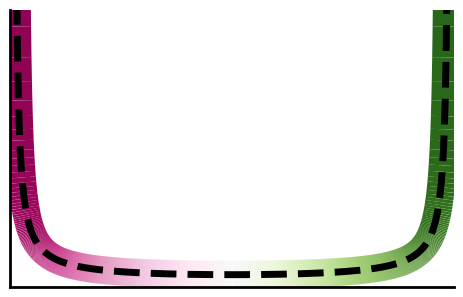

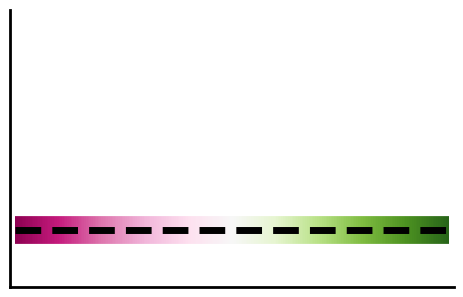

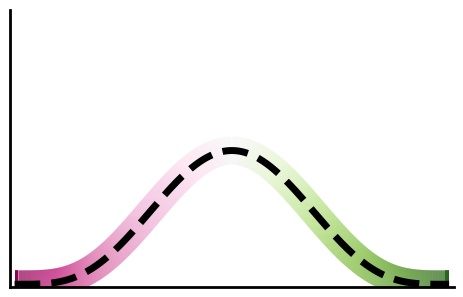

In [5]:
fig, ax = plot_beta_with_gradient(0.1, 0.1, Nbins=1000)  # Symmetric
fig.savefig('figures/Fig_0/beta_distribution05.pdf', dpi=300, bbox_inches='tight')
fig, ax = plot_beta_with_gradient(1, 1, Nbins=1000)  # Symmetric
fig.savefig('figures/Fig_0/beta_distribution1.pdf', dpi=300, bbox_inches='tight')
fig, ax = plot_beta_with_gradient(5, 5, Nbins=1000)  # Symmetric
fig.savefig('figures/Fig_0/beta_distribution5.pdf', dpi=300, bbox_inches='tight')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from typing import List, Optional, Tuple

def plot_contact_matrices(h_values: List[float], 
                         n_groups: int = 5,
                         figsize: Tuple[int, int] = (15, 3),
                         cmap: str = "Blues",
                         save_path: Optional[str] = None):
    """
    Plot contact matrices for different values of homophilic tendency (h).
    
    Args:
        h_values: List of homophilic tendency values to visualize
        n_groups: Number of population groups (matrix size will be n_groups x n_groups)
        figsize: Figure size (width, height)
        cmap: Colormap to use
        save_path: Path to save the figure (if None, figure is not saved)
        
    Returns:
        Matplotlib figure object
    """
    
    # Create a figure with subplots for each h value
    n_plots = len(h_values)
    fig, axes = plt.subplots(1, n_plots, figsize=figsize)
    
    # If only one h value, make axes iterable
    if n_plots == 1:
        axes = [axes]
    
    # Create an equal population distribution
    pop = jnp.ones(n_groups)*0.2
    
    # For each h value, create and plot the contact matrix
    for i, h in enumerate(axes):
        # Create contact matrix
        h_val = h_values[i]
        C = create_contact_matrix(n_groups, h_val, pop)
        C = np.flipud(C)
        # Plot as heatmap
        im = axes[i].imshow(C, cmap=cmap, vmin=0, vmax=3)
        
        # Add text annotations to each cell
        for row in range(n_groups):
            for col in range(n_groups):
                value = np.round(C[row, col],1)
                # Add text with value to each cell
                axes[i].text(col, row, f"{value:.1f}", ha="center", va="center", 
                           color="black" if value < 1.5 else "white", fontsize=8)
        
        axes[i].set_xticklabels([])
        axes[i].set_yticklabels([])        
        axes[i].grid(False)
        
        # Add h value as title
        #axes[i].set_title(f"h = {h_val}")
    
    fig.patch.set_visible(False)
    
    # Add some spacing between subplots
    plt.tight_layout()
    
    # Save if requested
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    return fig

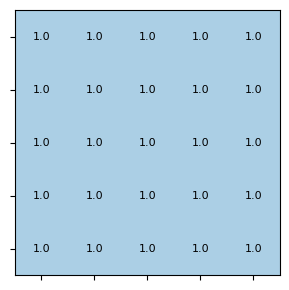

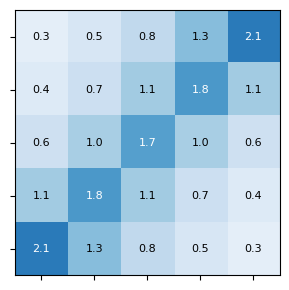

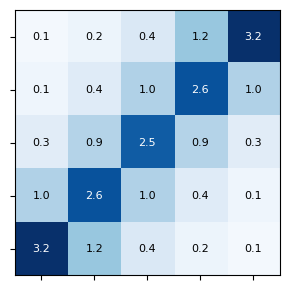

In [8]:
h = 4

h_values = [0]  # Different homophilic tendency values
fig = plot_contact_matrices(h_values, n_groups=5, save_path='figures/Fig_0/contact_matrices0.pdf')
plt.show()

h_values = [2]  # Different homophilic tendency values
fig = plot_contact_matrices(h_values, n_groups=5, save_path='figures/Fig_0/contact_matrices2.pdf')
plt.show()

h_values = [4]  # Different homophilic tendency values
fig = plot_contact_matrices(h_values, n_groups=5, save_path='figures/Fig_0/contact_matrices4.pdf')
plt.show()


In [8]:
a  =np.ones((5,5))*0.04*5

np.sum(a)

5.000000000000001

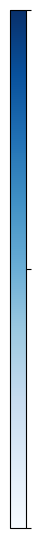

In [9]:
cbar_fig = create_standalone_colorbar(
    cmap_name='Blues',
    vmin=0,
    vmax=2,
    height=Ly*3,
    width=Ly/8*3,
    ticks=[0, 1, 2],
    ticklabels=[],
    save_path='figures/Fig_0/colorbar_contact_matrices.pdf'
)